
# Data Overview and Processing

## This is a example to studie the data provided

The code below demonstrates how to load, inspect, and process the data from `.npy` and `.nc` files. It includes steps to extract specific fields, visualize the data, and create composite images using selected bands. This workflow helps in understanding the structure and content of the data, as well as in generating meaningful visual representations for analysis.

1. **Loading Data**: The data is loaded from `.npy` files, and specific fields are extracted and stored in a list for further processing.
2. **Inspecting Data**: The extracted data is printed to provide an overview of its structure and content.
3. **Labeling Data**: Each data point is labeled based on specific criteria, such as the presence of clouds.
4. **Visualizing Data**: The data is visualized using matplotlib to create plots of different bands and composite images.
5. **Creating Composite Images**: Composite images are created using selected bands, and the images are displayed side by side for comparison.

This process provides a comprehensive understanding of the data and its characteristics, enabling effective analysis and interpretation.


In [22]:
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

npyPath = "skogsstyrelsen-data"
ncPath = "skogsstyrelsen-data/2A-netcdfs-cropped-from-nuria"

The code below outputs the information stored in the `.npy` JSON file. It loads the file, extracts specific fields (`ValideringsobjektBildId` and `MolnDis`), and prints the contents of the first five data points. The extracted information is stored in a list called `data_list` for further processing.

In [23]:
    
file_name = 'skogs_json_test.npy'
# Initialize data_list outside the loop
data_list = []

# Load and print contents of each file

full_path = os.path.join(npyPath, file_name)  # Include folder path
if os.path.exists(full_path):  # Ensure file exists
    data = np.load(full_path, allow_pickle=True)  # Load the .npy file
        # Extract 'ValideringsobjektBildId' and 'MolnDis' from each JSON line
    if isinstance(data, np.ndarray) and data.size > 0 and isinstance(data[0], dict):
        for item in data[:5]:  # Only process the first 5 data points
                print(item)
                valideringsobjekt_bild_id = item.get('ValideringsobjektBildId', 'N/A')
                moln_dis = item.get('MolnDis', 'N/A')
                # Add to a list of lists
                data_list.append([valideringsobjekt_bild_id, moln_dis])      
    else:
        print(f"File {file_name} does not contain the expected JSON data.")
else:
    print(f"File {file_name} does not exist.")





{'Bilddatum': '2019-09-19T00:00:00', 'MedianvardeB2': 0.094702356, 'MedianvardeB3': 0.11930823, 'MedianvardeB4': 0.15226941, 'MedianvardeB11': 0.29666, 'MedianvardeB12': 0.2657847, 'MedelvardeB2': 0.08789286, 'MedelvardeB3': 0.11191939, 'MedelvardeB4': 0.13810013, 'MedelvardeB11': 0.29279655, 'MedelvardeB12': 0.25594464, 'MinX': 561565.0, 'MinY': 6557585.0, 'MaxX': 561765.0, 'MaxY': 6557785.0, 'Processingdatum': '2023-03-20T18:16:20', 'ValideringsobjektId': '5d2a64c3-41c7-ed11-9174-005056a6f472', 'BkId': '65_5', 'MolnDis': '0', 'BildUrl': 'https://geodata.skogsstyrelsen.se/arcgis/rest/services/Swea/Sentinel2_2_0/ImageServer/exportImage?bbox=%28561565%2C+6557585%2C+561765%2C+6557785%29&bboxSR=3006&size=600%2C600&imageSR=3006&time=1568851200000.0&pixelType=UNKNOWN&noDataInterpretation=esriNoDataMatchAny&interpolation=RSP_BilinearInterpolation&mosaicRule=null&renderingRule=%7B%27rasterFunction%27%3A+%27SKS_NIR%27%7D&adjustAspectRatio=true&f=html', 'ValideringsobjektBildId': '765861ec-42c7

This code iterates over each item in the `data_list`. For each item, it extracts the `nc_file_id` (the first element) and determines the label based on the second element (`data[1]`). If `data[1]` is '1', the label is set to "cloudy"; otherwise, it is set to "not cloudy". It then prints the `nc_file_id` along with the label in a formatted string. The output will be a series of lines, each showing the NC File ID and whether it is labeled as "cloudy" or "not cloudy".

In [24]:
for data in data_list:
    nc_file_id = data[0]
    label = "cloudy" if data[1] == '1' else "not cloudy"
    print(f"NC File ID: {nc_file_id}, Label: {data[1]} = {label}")

NC File ID: 765861ec-42c7-ed11-9174-005056a6f472, Label: 0 = not cloudy
NC File ID: 1657a784-3ac7-ed11-9174-005056a6f472, Label: 0 = not cloudy
NC File ID: ee53636e-47c7-ed11-9174-005056a6f472, Label: 1 = cloudy
NC File ID: 6a61b1e6-45c7-ed11-9174-005056a6f472, Label: 0 = not cloudy
NC File ID: 50b88b11-3ec7-ed11-9174-005056a6f472, Label: 0 = not cloudy


## The output below will show the information inside the NC file (from two "images")

In [25]:
# Pick out index 0 and index 2
indices_to_pick = [0, 2]

for index in indices_to_pick:
    item = data_list[index]
    file_id, label = item
    file_path = os.path.join(ncPath, f'skgs_{file_id}.nc')

    try:
        # Open netCDF file
        with nc.Dataset(file_path, 'r') as dataset:
            print(f'NC information for file {file_id}:')
            print(dataset)
    except Exception as e:
        print(f"Error opening file {file_path}: {e}")


NC information for file 765861ec-42c7-ed11-9174-005056a6f472:
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    date_created: 2023-06-28T13:14:57.735408
    Conventions: CF-1.6, ACDD-1.3
    history: NetCDF-CF file created by datacube version '1.8.12' at 20230628.
    coordinates: spatial_ref
    geospatial_bounds: POLYGON ((16.07997529267953 59.15292202832922, 16.080034707797036 59.154807583674135, 16.07636365631408 59.15483805109946, 16.076304443054113 59.15295249348881, 16.07997529267953 59.15292202832922))
    geospatial_bounds_crs: EPSG:4326
    geospatial_lat_min: 59.15292202832922
    geospatial_lat_max: 59.15483805109946
    geospatial_lat_units: degrees_north
    geospatial_lon_min: 16.076304443054113
    geospatial_lon_max: 16.080034707797036
    geospatial_lon_units: degrees_east
    dimensions(sizes): time(1), y(21), x(21)
    variables(dimensions): float64 time(time), float64 y(y), float64 x(x), int32 spatial_ref(), float32 b01(time, y, x), f

## The output below will show the information about each band  (from two "images")

In [26]:
indices_to_pick = [0, 2]
band_info_list = []

for index in indices_to_pick:
    item = data_list[index]
    file_id, label = item
    file_path = os.path.join(ncPath, f'skgs_{file_id}.nc')
    
    try:
        # Open netCDF file
        with nc.Dataset(file_path, 'r') as dataset:
            print(f'NC information for file {file_id}:')
            for var_name in dataset.variables:
                if var_name.startswith('b'):
                    band_data = dataset.variables[var_name][:]
                    band_info_list.append((var_name, band_data))
                    print(f'Band: {var_name}, Data: {band_data}')
    except Exception as e:
        print(f"Error opening file {file_path}: {e}")
print(len(band_info_list))
# band_info_list now contains the information of every band for the selected indices

NC information for file 765861ec-42c7-ed11-9174-005056a6f472:
Band: b01, Data: [[[540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [540. 540. 540. 540. 540. 377. 377. 377. 377. 377. 377. 567. 567. 567.
   567. 567. 567. 702. 702. 702. 702.]
  [652. 652. 652. 652. 652. 583. 583. 583. 583. 583. 583. 661. 661. 661.
   661. 661. 661. 717. 717. 717. 717.]
  [652. 652. 652. 652. 652. 583. 583. 583. 583. 583. 583. 661. 661. 661.
   661. 661. 661. 717. 717. 717. 717.]
  [652. 652. 652. 652. 65

## Training Set Images and Bands



### Picture One: No Clouds
Picture One in the training set is an image that represents a clear sky with no clouds. 

### Picture Three: Cloudy
Picture Three, on the other hand, represents a sky with clouds. 



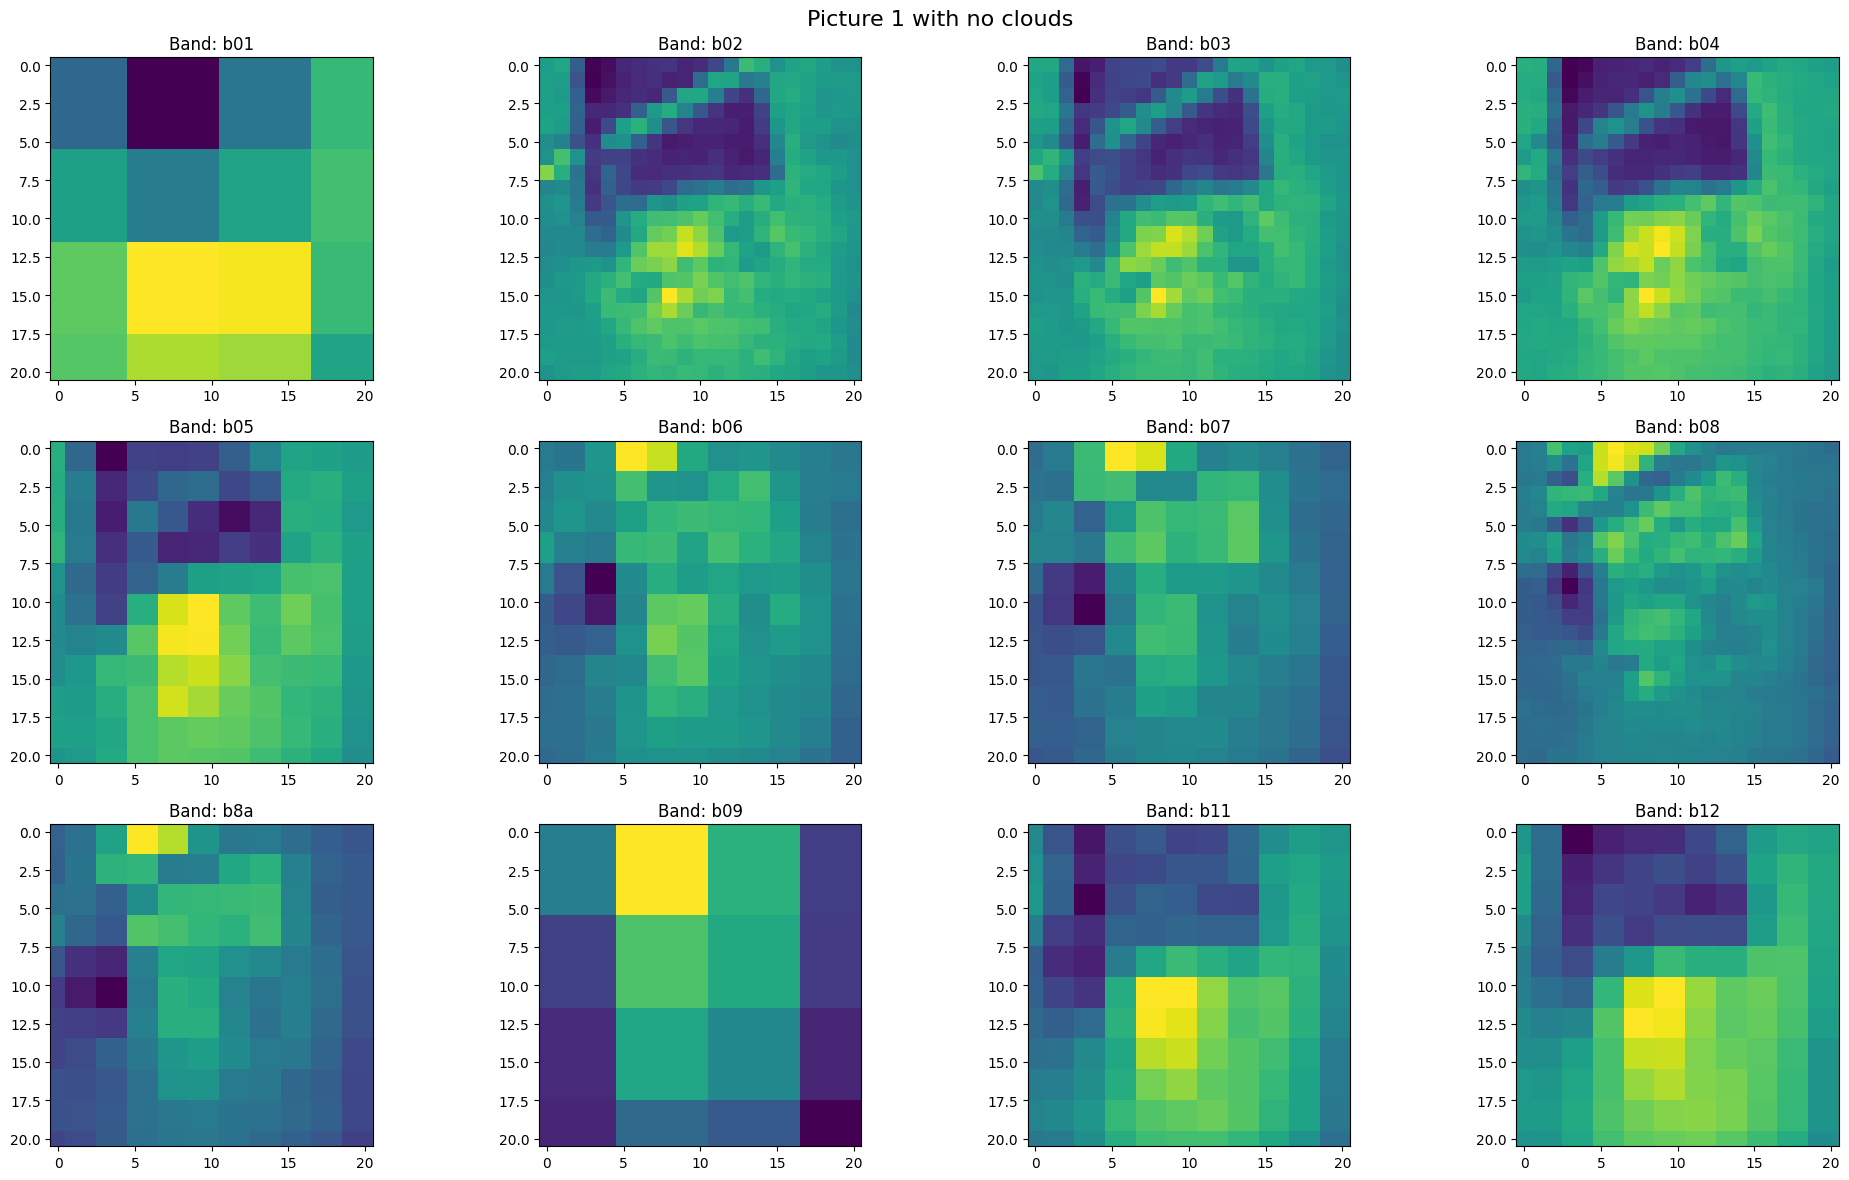

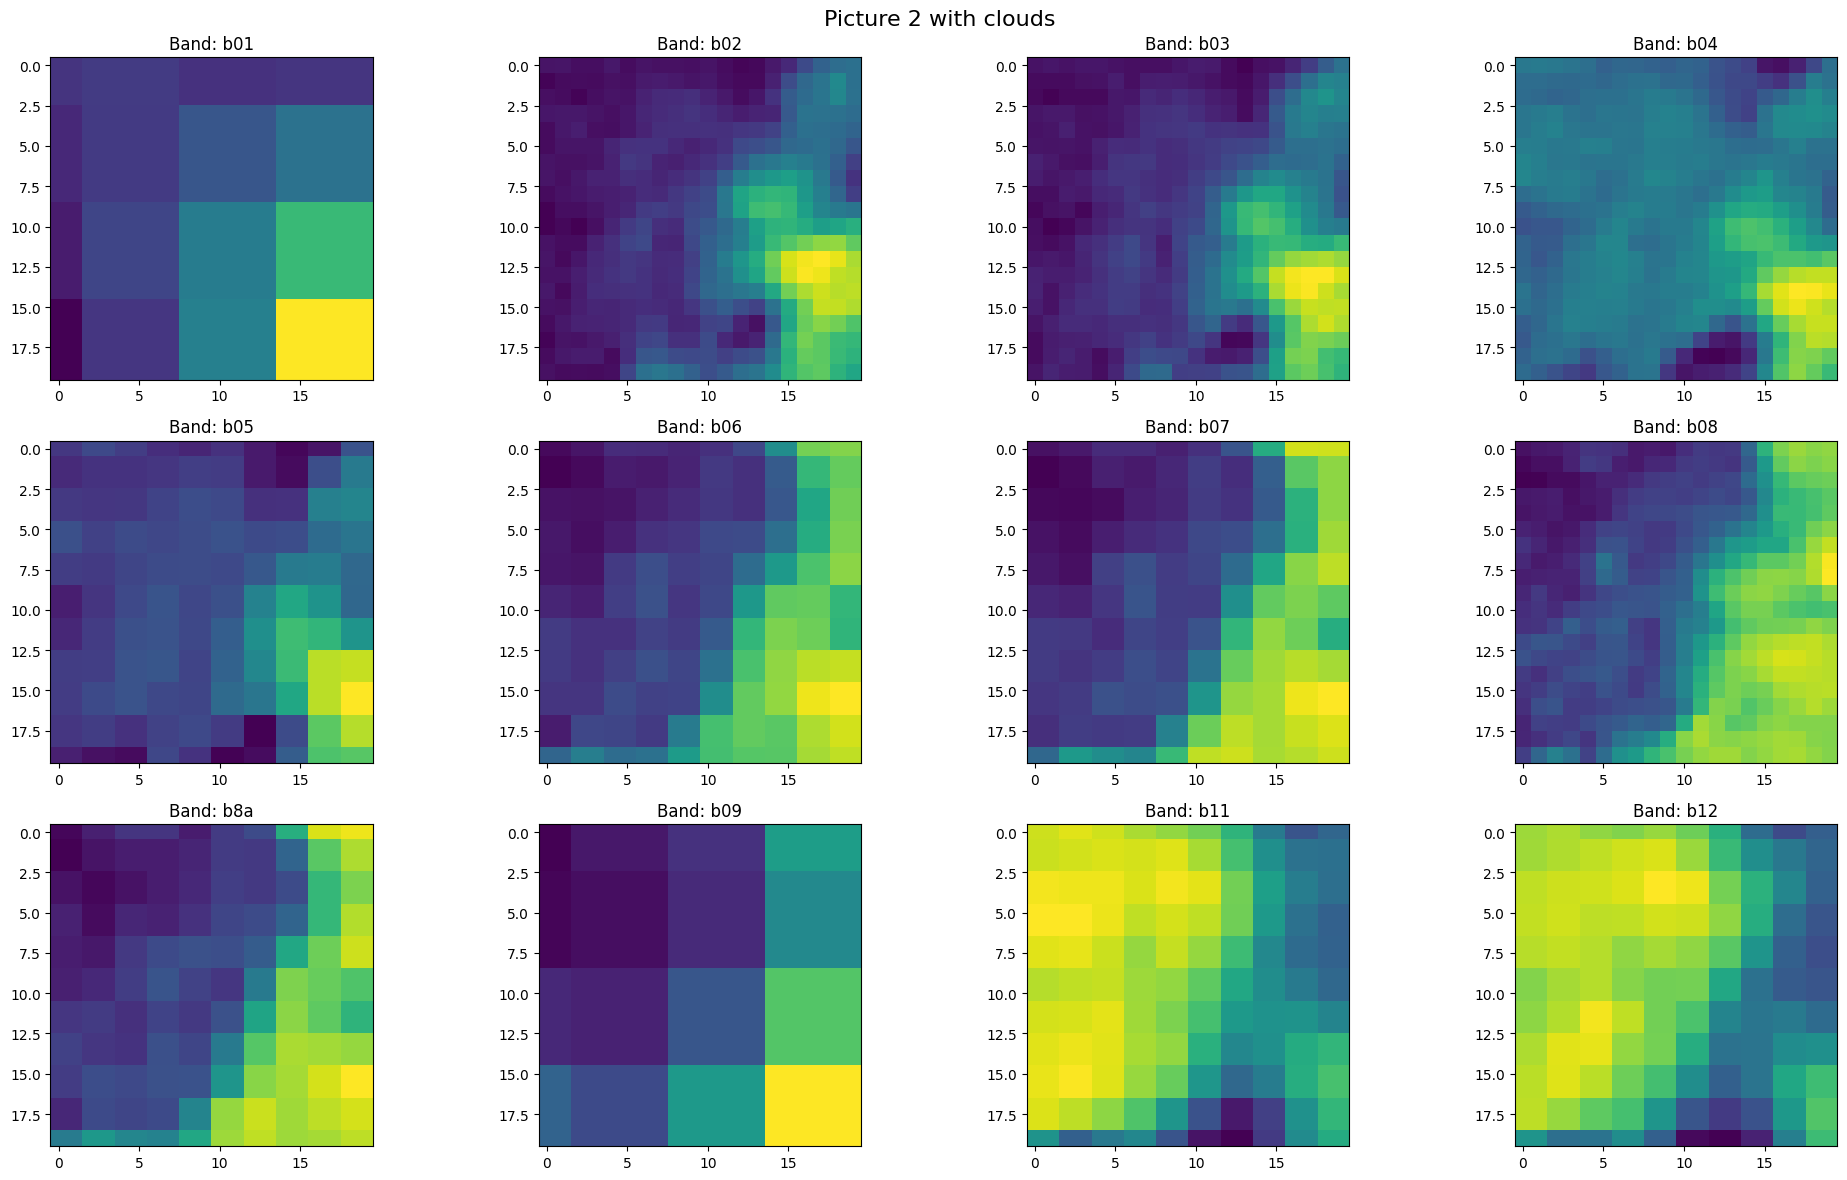

In [27]:
# Plot the first 12 bands in band_info_list in a grid with at most 4 per row
num_bands_first = 12
num_cols_first = 4
num_rows_first = (num_bands_first + num_cols_first - 1) // num_cols_first

fig_first, axes_first = plt.subplots(num_rows_first, num_cols_first, figsize=(20, num_rows_first * 4))
fig_first.suptitle("Picture 1 with no clouds", fontsize=16)

for i, (band_name, band_data) in enumerate(band_info_list[:num_bands_first]):
    row = i // num_cols_first
    col = i % num_cols_first
    ax = axes_first[row, col]
    im = ax.imshow(band_data[0], cmap='viridis')
    ax.set_title(f'Band: {band_name}')

# Hide any empty subplots
for j in range(i + 1, num_rows_first * num_cols_first):
    fig_first.delaxes(axes_first.flatten()[j])

plt.tight_layout()
plt.show()

# Plot the last 12 bands in band_info_list in a grid with at most 4 per row
num_bands_last = 12
num_cols_last = 4
num_rows_last = (num_bands_last + num_cols_last - 1) // num_cols_last

fig_last, axes_last = plt.subplots(num_rows_last, num_cols_last, figsize=(20, num_rows_last * 4))
fig_last.suptitle("Picture 2 with clouds", fontsize=16)

for i, (band_name, band_data) in enumerate(band_info_list[-num_bands_last:]):
    row = i // num_cols_last
    col = i % num_cols_last
    ax = axes_last[row, col]
    im = ax.imshow(band_data[0], cmap='viridis')
    ax.set_title(f'Band: {band_name}')

# Hide any empty subplots
for j in range(i + 1, num_rows_last * num_cols_last):
    fig_last.delaxes(axes_last.flatten()[j])

plt.tight_layout()
plt.show()

# RGB Composite Images

The following code snippet demonstrates how to create and display RGB composite images using selected bands from satellite data. The images are represented using RGB colors, where each band corresponds to one of the Red, Green, or Blue channels.

1. **Band Selection**: The bands `b04`, `b03`, and `b02` are selected for the Red, Green, and Blue channels, respectively.

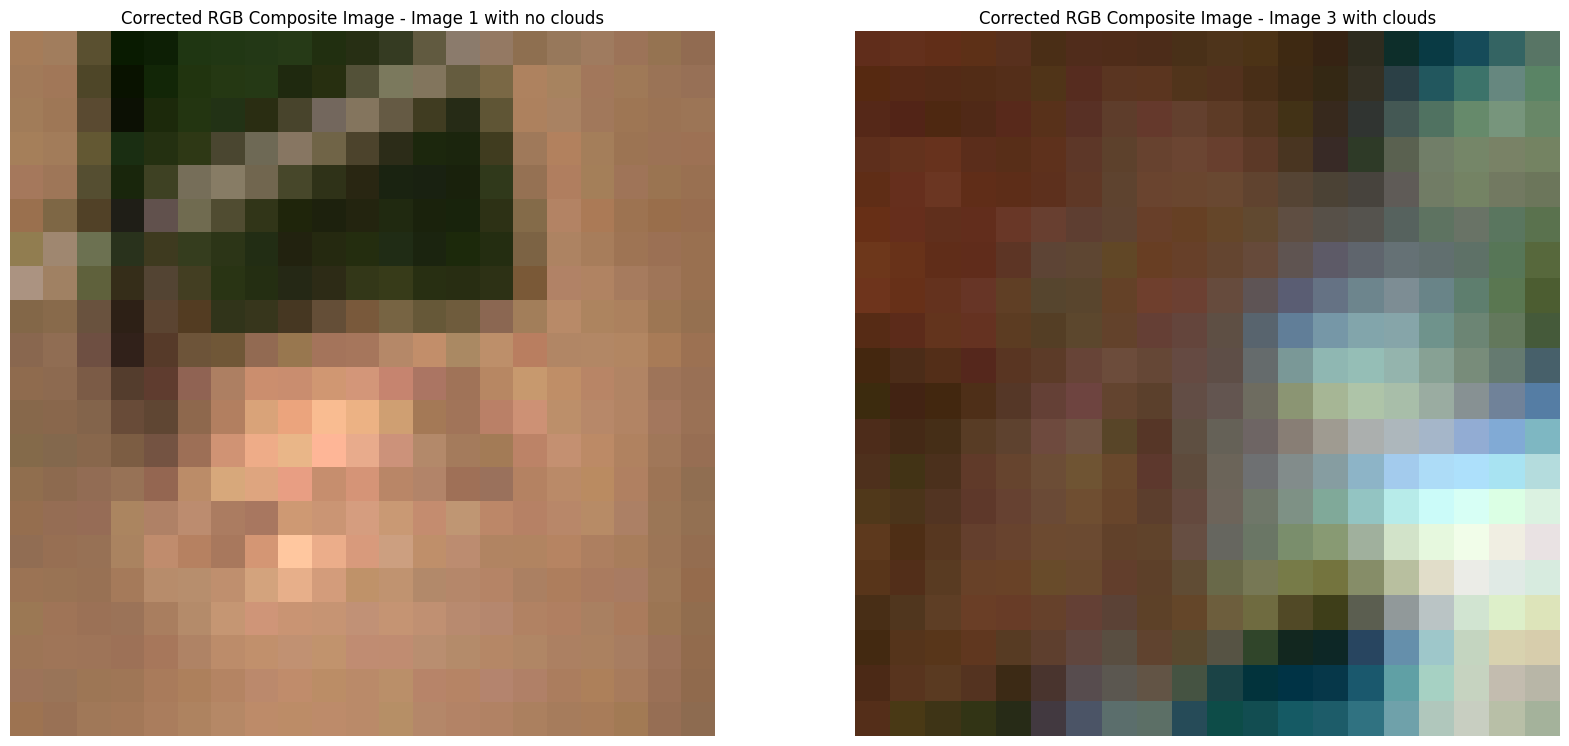

In [28]:


# Select correct bands for RGB image (True Color)
rgb_bands = ["b04", "b03", "b02"]

# Create a dictionary from band_info_list
band_info_dict_first = {band_name: band_data for band_name, band_data in band_info_list[:12]}
band_info_dict_last = {band_name: band_data for band_name, band_data in band_info_list[12:]}

# Extract the required bands and remove extra dimension if needed (shape: (1, H, W) → (H, W))
rgb_image_first = np.dstack([band_info_dict_first[b][0] for b in rgb_bands])
rgb_image_last = np.dstack([band_info_dict_last[b][0] for b in rgb_bands])

# Normalize function to scale values between 0-255
def normalize(image):
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)

rgb_image_first = normalize(rgb_image_first)
rgb_image_last = normalize(rgb_image_last)

# Display the images side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image_first)
plt.title("Corrected RGB Composite Image - Image 1 with no clouds")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_image_last)
plt.title("Corrected RGB Composite Image - Image 3 with clouds")
plt.axis("off")

plt.show()


# Green, Red, SWIR1, and SWIR2 Composite Images

The following code snippet demonstrates how to create and display composite images using selected bands from satellite data. The images are represented using Green, Red, SWIR1, and SWIR2 channels, where each band corresponds to one of the Green, Red, SWIR1, or SWIR2 channels.

1. **Band Selection**: The bands `b11`, `b03`, `b02`, and `b12` are selected for the Green, Red, SWIR1, and SWIR2 channels, respectively.

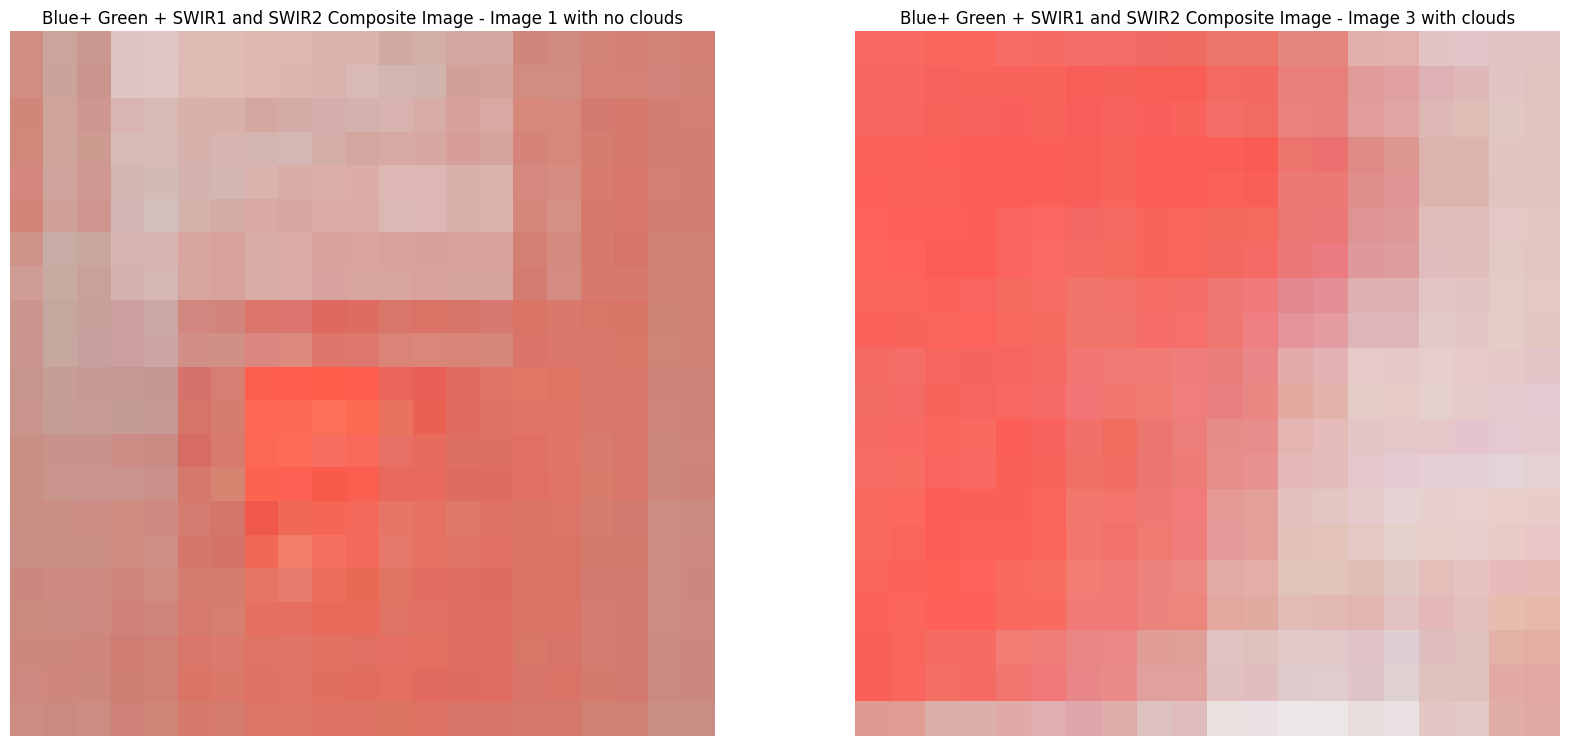

In [29]:


# Select correct bands for RGB image (True Color)
true_colour_swir = ["b11", "b03", "b02","b12"]

# Create a dictionary from band_info_list
band_info_dict_first = {band_name: band_data for band_name, band_data in band_info_list[:12]}
band_info_dict_last = {band_name: band_data for band_name, band_data in band_info_list[12:]}

# Extract the required bands and remove extra dimension if needed (shape: (1, H, W) → (H, W))
true_colour_swir_first = np.dstack([band_info_dict_first[b][0] for b in true_colour_swir])
true_colour_swir_last = np.dstack([band_info_dict_last[b][0] for b in true_colour_swir])

# Normalize function to scale values between 0-255
def normalize(image):
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)

true_colour_swir_first = normalize(true_colour_swir_first)
true_colour_swir_last = normalize(true_colour_swir_last)

# Display the images side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(true_colour_swir_first)
plt.title("Blue+ Green + SWIR1 and SWIR2 Composite Image - Image 1 with no clouds")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(true_colour_swir_last)
plt.title("Blue+ Green + SWIR1 and SWIR2 Composite Image - Image 3 with clouds")
plt.axis("off")

plt.show()


# RGB + SWIR1 Composite Images

The following code snippet demonstrates how to create and display composite images using selected bands from satellite data. The images are represented using RGB + SWIR1 channels, where each band corresponds to one of the Red, Green, Blue, or SWIR1 channels.

1. **Band Selection**: The bands `b04`, `b03`, `b02`, and `b11` are selected for the Red, Green, Blue, and SWIR1 channels, respectively.

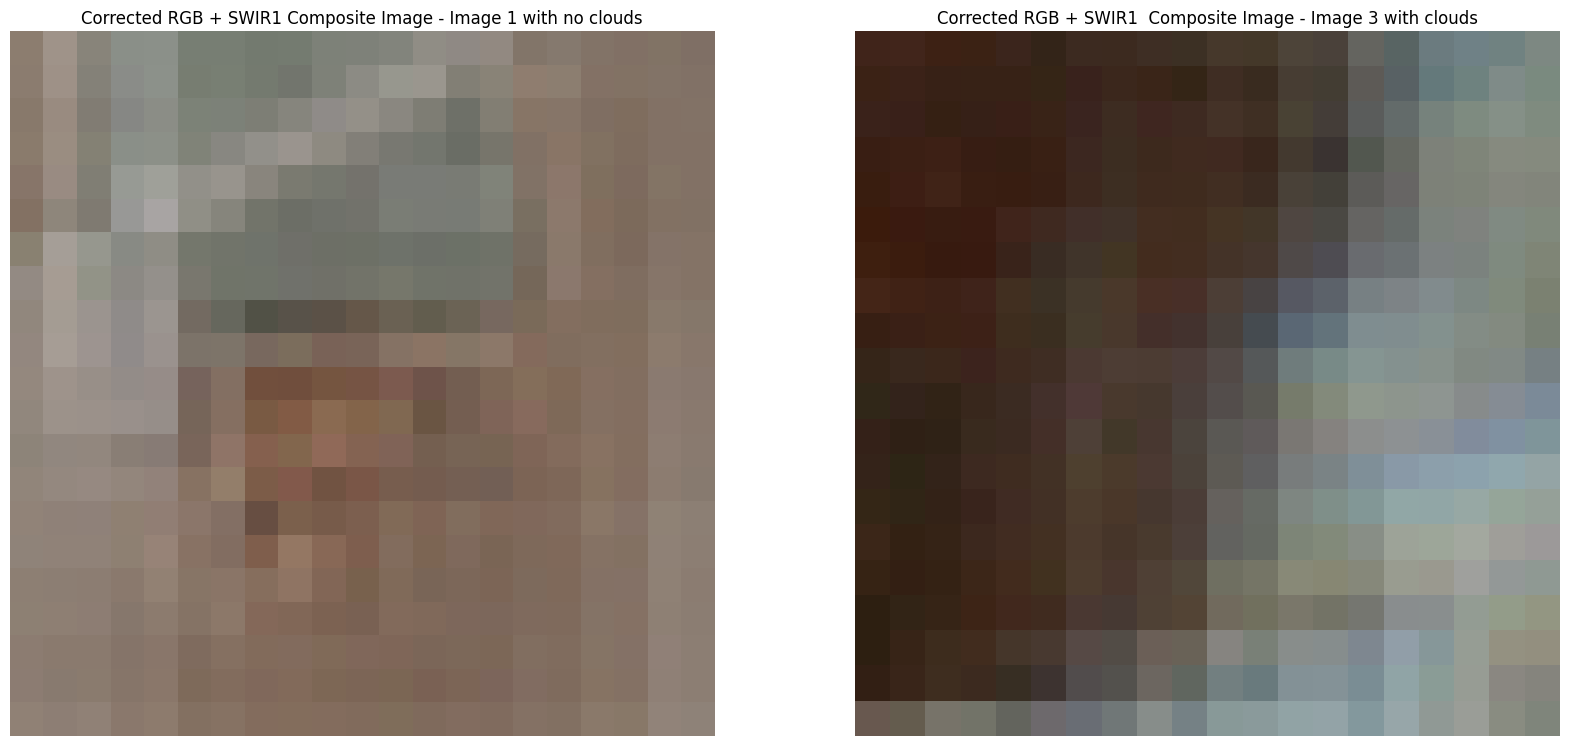

In [30]:


# Select correct bands for RGB image (True Color)
rgb_bands = ["b04", "b03", "b02","b11"]

# Create a dictionary from band_info_list
band_info_dict_first = {band_name: band_data for band_name, band_data in band_info_list[:12]}
band_info_dict_last = {band_name: band_data for band_name, band_data in band_info_list[12:]}

# Extract the required bands and remove extra dimension if needed (shape: (1, H, W) → (H, W))
rgb_image_first = np.dstack([band_info_dict_first[b][0] for b in rgb_bands])
rgb_image_last = np.dstack([band_info_dict_last[b][0] for b in rgb_bands])

# Normalize function to scale values between 0-255
def normalize(image):
    return ((image - np.min(image)) / (np.max(image) - np.min(image)) * 255).astype(np.uint8)

rgb_image_first = normalize(rgb_image_first)
rgb_image_last = normalize(rgb_image_last)

# Display the images side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image_first)
plt.title("Corrected RGB + SWIR1 Composite Image - Image 1 with no clouds")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_image_last)
plt.title("Corrected RGB + SWIR1  Composite Image - Image 3 with clouds")
plt.axis("off")

plt.show()
